In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

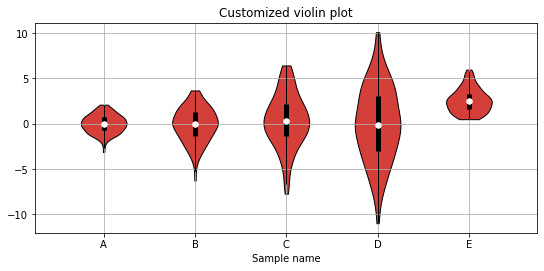

In [5]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

data += [sorted(3 * np.random.weibull(2, 100))]

fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D', 'E']

set_axis_style(ax2, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.grid(True)
plt.show()

In [6]:
print(data)

[[-3.121838527750614, -2.262283088410026, -1.884697692756784, -1.715554785160731, -1.5158787721745357, -1.410088194402538, -1.3584770112725197, -1.3207765603350463, -1.2738157597155664, -1.23738910381811, -1.2307870529506515, -1.2269977854322833, -1.1961980903270952, -1.1275021170675945, -1.1232790206733962, -1.1183151725303673, -1.114604665368022, -1.110608976737172, -1.0904711851280051, -0.9648635644810544, -0.9536444665330561, -0.8989277998441216, -0.8093447934601005, -0.74972665959341, -0.7025908475465444, -0.6492881168415856, -0.6071839128156995, -0.6032194817994879, -0.5971675819098856, -0.5363684671358677, -0.5193174359901142, -0.5174420744693574, -0.497319496500776, -0.48316060246183784, -0.48194437611005925, -0.4784195763579415, -0.4310506867660867, -0.30831923719054405, -0.2711051463590511, -0.266608341359897, -0.2539840502382806, -0.22905115771553702, -0.21699692550435176, -0.1426382068941453, -0.12758733346403073, -0.1172265226167112, -0.05911741569627351, -0.04539672046419

In [1]:
np.random.weibull?

In [26]:

class MultiArmedBandit:
    def __init__(K=10, mus=None, sigmas=None, seed=None):
        self.K = K
        self.mus = mus
        self.sigmas = sigmas
        self.seed = seed
        
        if self.mu is None and self.sigma is None:
            self._init_random_distributions()
            
    def _init_random_distribution(self):
        if self.seed is not None:
            np.seed(self.seed)
        self.mus = tuple(np.random.uniform(-3, 3, size=self.K))
        self.sigmas = tuple(np.random.normal(0, 2, size=self.K))
    
    def get_plt_distribution(self):
        
        def adjacent_values(vals, q1, q3):
            upper_adjacent_value = q3 + (q3 - q1) * 1.5
            upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

            lower_adjacent_value = q1 - (q3 - q1) * 1.5
            lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
            return lower_adjacent_value, upper_adjacent_value


        def set_axis_style(ax, labels):
            ax.get_xaxis().set_tick_params(direction='out')
            ax.xaxis.set_ticks_position('bottom')
            ax.set_xticks(np.arange(1, len(labels) + 1))
            ax.set_xticklabels(labels)
            ax.set_xlim(0.25, len(labels) + 0.75)
            ax.set_xlabel('Sample name')
        
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)
        ax.set_title('Customized violin plot')
        parts = ax.violinplot(
                data, showmeans=False, showmedians=False,
                showextrema=False)

        for pc in parts['bodies']:
            pc.set_facecolor('#D43F3A')
            pc.set_edgecolor('black')
            pc.set_alpha(1)

        quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
        whiskers = np.array([
            adjacent_values(sorted_array, q1, q3)
            for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
        whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

        inds = np.arange(1, len(medians) + 1)
        ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
        ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
        ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

        # axis labels:
        labels = [fr'$K_{j}$' for j in range(1, self.K + 1)]

        set_axis_style(ax2, labels)

        plt.subplots_adjust(bottom=0.15, wspace=0.05)
        plt.grid(True)
        plt.show()
    
    def draw_from_arm(self, k):
        if k not in range(1, self.K + 1):
            raise ValueError(f"The arm k={k} must be between 1 and {self.K + 1}.")
        return np.random.normal(self.mu[k], self.sigma[k])
    
    def random_parameters_update(self):
        pass

array([ 0.39149288, -2.43842736,  1.18605878, -0.17371077,  1.15471087,
       -0.83188302, -0.9955948 ,  2.86972589,  1.97032882,  0.29434301])

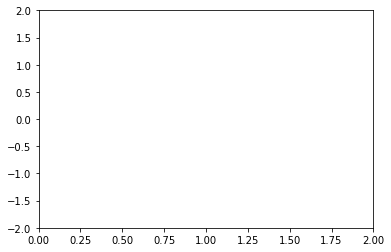

In [8]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()